In [23]:
#Debbugger for ipython
from IPython.terminal.debugger import set_trace as keyboard

#locate coco_pythonAPI
import sys
sys.path.append('../cocoapi/PythonAPI/')

#locate home position
from os.path import expanduser
home = expanduser("~")

from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

#setup image size
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

#Setup data path
dataDir = home + "/dataset/coco"
dataType = "val2017"
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

coco = COCO(annFile)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


In [24]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))


COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor food indoor appliance sports person animal vehicle furniture accessory electronic kitchen


In [25]:
#You can also check all information in cats
print cats

[{u'supercategory': u'person', u'id': 1, u'name': u'person'}, {u'supercategory': u'vehicle', u'id': 2, u'name': u'bicycle'}, {u'supercategory': u'vehicle', u'id': 3, u'name': u'car'}, {u'supercategory': u'vehicle', u'id': 4, u'name': u'motorcycle'}, {u'supercategory': u'vehicle', u'id': 5, u'name': u'airplane'}, {u'supercategory': u'vehicle', u'id': 6, u'name': u'bus'}, {u'supercategory': u'vehicle', u'id': 7, u'name': u'train'}, {u'supercategory': u'vehicle', u'id': 8, u'name': u'truck'}, {u'supercategory': u'vehicle', u'id': 9, u'name': u'boat'}, {u'supercategory': u'outdoor', u'id': 10, u'name': u'traffic light'}, {u'supercategory': u'outdoor', u'id': 11, u'name': u'fire hydrant'}, {u'supercategory': u'outdoor', u'id': 13, u'name': u'stop sign'}, {u'supercategory': u'outdoor', u'id': 14, u'name': u'parking meter'}, {u'supercategory': u'outdoor', u'id': 15, u'name': u'bench'}, {u'supercategory': u'animal', u'id': 16, u'name': u'bird'}, {u'supercategory': u'animal', u'id': 17, u'name'

In [26]:
#You can find a picture contains category
catIds = coco.getCatIds(catNms=['person','dog','skateboard'])
print catIds # Print out catID

[1, 18, 41]


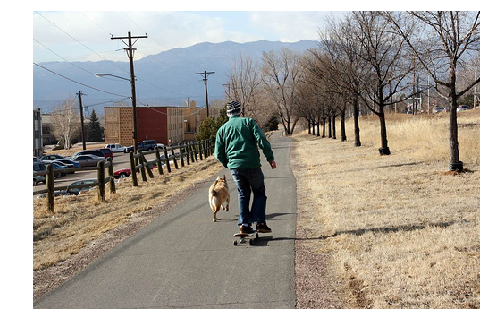

In [34]:
imgIds = coco.getImgIds(catIds=catIds ) #Find images contains catIds elements

#Test
#imgIds = coco.getImgIds(imgIds = [324158])

# get all images containing given categories, select one at random
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

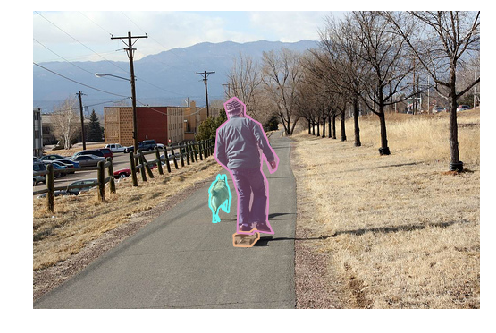

In [35]:
#Lets check with annotation
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
plt.show()

In [36]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.36s)
creating index...
index created!


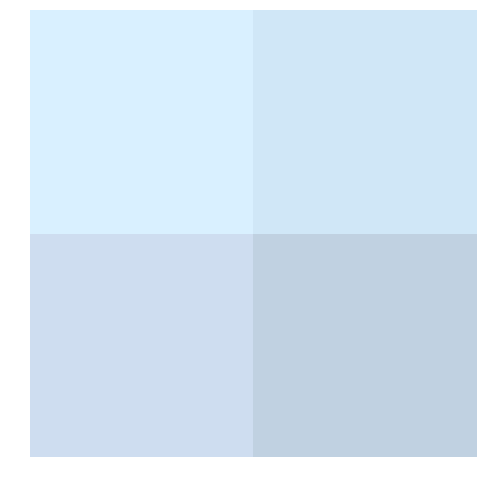

In [37]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id'])
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I)
plt.axis('off')
plt.show()